# Epidimc simulation

## Model

let $I(t)$ be the proportion of infected persons,

$S(t)$ the proportion of healthy person, 

and $R(t)$ the proportion of recovered person


The first basic model is :

$S'(t) = - \beta *S(t)*I(t) $ <br/>
$I'(t) = \beta *S(t)*I(t) - 1/\lambda * I(t) $ <br/>
$R'(t) = 1/\lambda * I(t) $


note that the differential system has a **null divergence**



Let $Y(t) \in R^3$ the following vector :
$$Y(t) = (S(t),I(t),R(t))^\top$$
and 
$$Y(0) = (1,\epsilon,0)^\top$$

where $  \frac{1}{N_{individus}} \le \epsilon \le 1 $


# Lets code

## resolution example

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [33]:
def first_model(t,y,a,b):
    
    inf_p = b*y[0]*y[1] #infected_people 
    r_p = 1/a * y[1]
    
    dydt = np.array([-inf_p,inf_p-r_p,r_p])
    return dydt

y0_first_model = np.array([1,1e-2,0])

labels=["healthy","infected","recovered"]
y0_first_model= np.array([1,epsilon,0])


In [34]:
def show_simu_results(sol,labels):
    fig, ax = plt.subplots(figsize=(14, 5))
    ax.set_xlabel('time [day]')
    ax.set_ylabel('population proportion []')

    for i in range(len(sol.y)):
        ax.plot(sol.t,sol.y[i],label=labels[i])

    plt.legend()

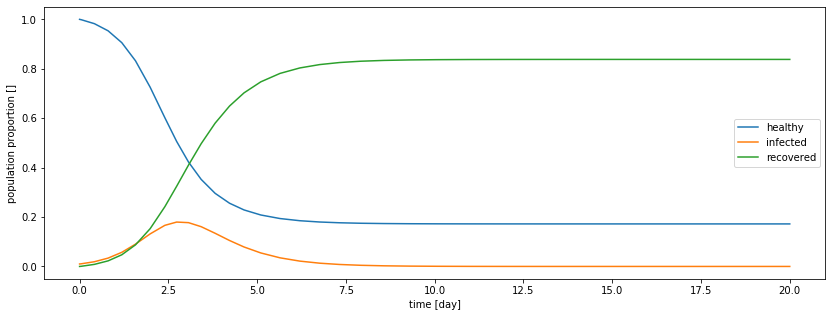

In [35]:
epsilon=1e-2
a= 0.7 # infection
b=3 # recovering capatibility
t_max=20

f = lambda t,y:first_model(t,y,a,b)
y0= y0_first_model
sol = integrate.solve_ivp(f, [0,t_max], y0,rtol=1e-10)  

show_simu_results(sol,labels)

# Advance model

lets add $D(t)$ the number of death

the system is now :  <br/>
$S'(t) = - \beta *S(t)*I(t) $ <br/>
$I'(t) = \beta *S(t)*I(t) - 1/\lambda * I(t)  - \mu*I(t)$ <br/>
$R'(t) = 1/\lambda* I(t) $ <br/>
$D'(t) = \mu*I(t)$

and 

$$Y(t) = (S(t),I(t),R(t),D(t))^\top$$


In [64]:
def second_model(t,y,a,b,mu):
    
    infected = b*y[0]*y[1] #infected_people 
    recovered = 1/a * y[1]
    
    dead = mu*y[1]
    
    dydt = np.array([-infected , infected-recovered - dead , recovered,dead])

    return dydt

y0_second_model = np.array([1,1e-2,0,0])

labels=["healthy","infected","recovered","dead"]

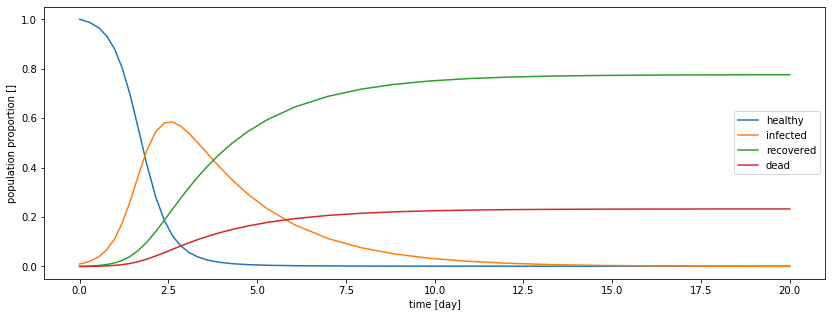

In [66]:
epsilon=1e-2
a=3
b=3
mu = 0.1
t_max=20

f = lambda t,y:second_model(t,y,a,b,mu)
y0= y0_second_model
sol = integrate.solve_ivp(f, [0,t_max], y0,rtol=1e-10)  

show_simu_results(sol,labels)


# incubation period

lets add $C(t)$ the number of of people who are infected but not sick yet

the system is now :  <br/>
$S'(t) = - \beta *S(t)*I(t) $ <br/>
$C'(t) = \beta *S(t)*I(t) - C/\nu $ <br/>
$I'(t) = C/\nu - 1/\lambda * I(t) $ <br/>
$R'(t) = 1/\lambda* I(t) $ <br/>
$D'(t) = \mu*I(t)$

and 

$$Y(t) = (S(t),I(t),R(t),D(t),C(t))^\top$$

In [68]:
def third_model(t,y,a,b,mu,v):
    
    infected = b*y[0]*y[1] #infected_people 
    recovered = 1/a * y[1]
    
    dead = mu*y[1]
    
    sick = y[4]/v
    
    dydt = np.array([-infected ,sick-recovered - dead , recovered,dead,-sick+infected])
    return dydt

y0_third_model = np.array([1,1e-2,0,0,0])

labels=["healthy","infected","recovered","dead","in_incubation"]

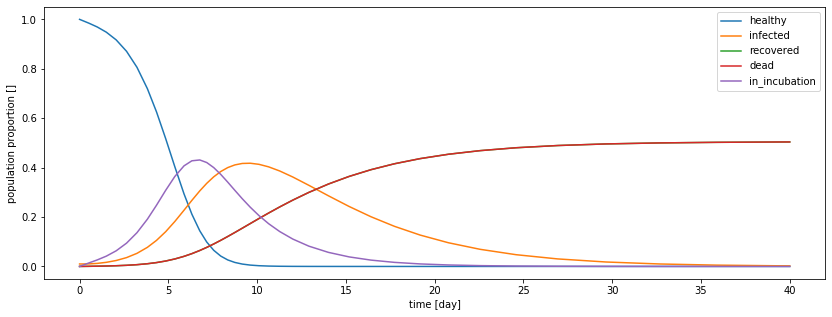

In [69]:
epsilon=1e-2
a=10
b=3
mu = 0.1
v= 3
t_max=40

f = lambda t,y:third_model(t,y,a,b,mu,v)
y0= y0_third_model
sol = integrate.solve_ivp(f, [0,t_max], y0,rtol=1e-10)  

show_simu_results(sol,labels)